Importing the Dependencies

In [ ]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df=pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')

In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [ ]:
for i in df.iloc[: , 5 : ].columns:
    print(f'{i} : {df[i].nunique()}')

Rating : 5
Recommended IND : 2
Positive Feedback Count : 82
Division Name : 3
Department Name : 6
Class Name : 20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


##**EXPLORATORY DATA ANALYSIS**

In [ ]:
import seaborn as sns

BAR PLOTS

<Axes: xlabel='Rating', ylabel='count'>

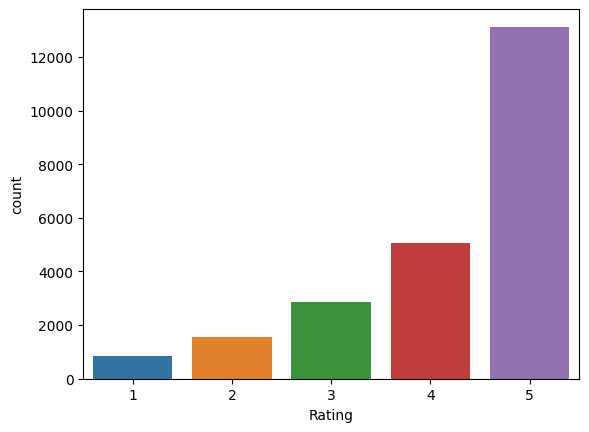

In [ ]:
sns.countplot(x='Rating',data=df)

<Axes: xlabel='Recommended IND', ylabel='count'>

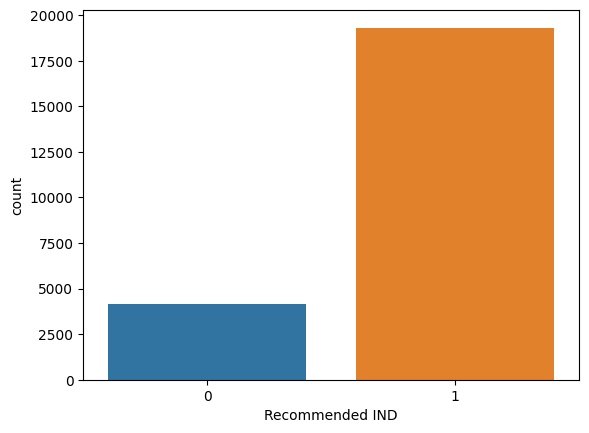

In [ ]:
sns.countplot(x='Recommended IND',data=df)

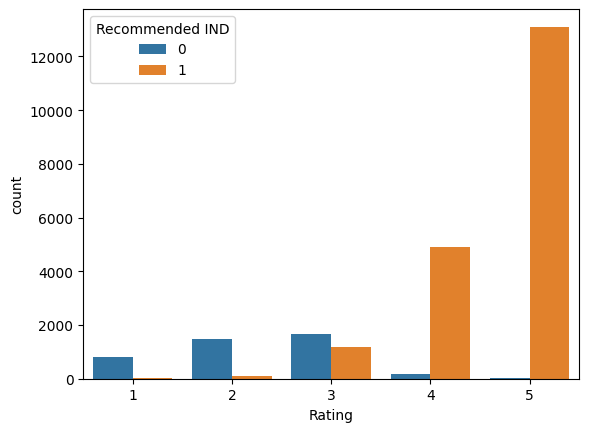

In [ ]:
sns.countplot(x='Rating', hue = 'Recommended IND',data=df);

In [ ]:
import plotly.graph_objects as go

RADAR PLOT

In [ ]:
depart_rate = df.groupby(['Department Name','Rating']).size()

Bottoms  = np.round(depart_rate['Bottoms'].values/depart_rate['Bottoms'].values.sum(),2)
Dresses  = np.round(depart_rate['Dresses'].values/depart_rate['Dresses'].values.sum(),2)
Intimate = np.round(depart_rate['Intimate'].values/depart_rate['Intimate'].values.sum(),2)
Jackets  = np.round(depart_rate['Jackets'].values/depart_rate['Jackets'].values.sum(),2)
Tops     = np.round(depart_rate['Tops'].values/depart_rate['Tops'].values.sum(),2)
Trend    = np.round(depart_rate['Trend'].values/depart_rate['Trend'].values.sum(),2)

categories = ['Rating: 1', 'Rating: 2', 'Rating: 3', 'Rating: 4', 'Rating: 5']

# radar plot (Jacket & Trend)
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
             r = Bottoms, 
             theta = categories,
             fill = 'toself',
             name = 'Bottoms',
             visible='legendonly',
             ))
fig.add_trace(go.Scatterpolar(
             r = Dresses, 
             theta = categories,
             fill = 'toself',
             name = 'Dresses',
             visible='legendonly',
             ))
fig.add_trace(go.Scatterpolar(
             r = Intimate, 
             theta = categories,
             fill = 'toself',
             name = 'Intimate',
             visible='legendonly',
             ))

fig.add_trace(go.Scatterpolar(
             r = Jackets, 
             theta = categories,
             fill = 'toself',
             name = 'Jackets',
             ))

fig.add_trace(go.Scatterpolar(
             r = Tops, 
             theta = categories,
             fill = 'toself',
             name = 'Tops',
             visible='legendonly',
             ))

fig.add_trace(go.Scatterpolar(
             r = Trend, 
             theta = categories,
             fill = 'toself',
             name = 'Trend',
             ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 0.65]
        )
    ),
    showlegend=True,
    title = 'Department by Rating (Radar Plot)',
    font = dict(size=17, family = 'Franklin Gothic')
)

fig.layout.template = 'none'
fig.show()

In [ ]:
rating = df.groupby('Rating').mean()
rating

<ipython-input-13-2e4d2f9655fa>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Unnamed: 0,Clothing ID,Age,Recommended IND,Positive Feedback Count
Rating,,,,,
1,11949.839667,916.214964,43.693587,0.019002,3.459620
2,11751.965495,925.016613,42.622364,0.060064,3.325879
3,11698.867294,928.110414,42.158481,0.414141,3.145246
4,11734.964349,921.410282,42.887532,0.966910,2.405554
5,11740.530196,913.961389,43.583124,0.998096,2.299749


CORRELATION OF NUMERICAL DATA

In [ ]:
rating.drop(["Unnamed: 0","Clothing ID"], axis='columns').corr()

,Age,Recommended IND,Positive Feedback Count
Age,1.000000,0.115681,-0.194958
Recommended IND,0.115681,1.000000,-0.987748
Positive Feedback Count,-0.194958,-0.987748,1.000000


In [ ]:
e_commerce_class = df[(df.Rating==1) | (df.Rating==5)]
e_commerce_class.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
6,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
8,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses


In [ ]:
X = e_commerce_class['Review Text']
y = e_commerce_class['Rating']

##**DATA MODELING**

#**MACHINE LEARNING APPROACH**

NAIVE BAYES

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
cv = CountVectorizer()
X = cv.fit_transform(X.values.astype('U'))

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

nb = MultinomialNB()
nb.fit(X_train,y_train)
predictions = nb.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 107  139]
 [  13 3933]]


              precision    recall  f1-score   support

           1       0.89      0.43      0.58       246
           5       0.97      1.00      0.98      3946

    accuracy                           0.96      4192
   macro avg       0.93      0.72      0.78      4192
weighted avg       0.96      0.96      0.96      4192



RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))


[[  17  229]
 [   0 3946]]


              precision    recall  f1-score   support

           1       1.00      0.07      0.13       246
           5       0.95      1.00      0.97      3946

    accuracy                           0.95      4192
   macro avg       0.97      0.53      0.55      4192
weighted avg       0.95      0.95      0.92      4192



LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 148   98]
 [  31 3915]]


              precision    recall  f1-score   support

           1       0.83      0.60      0.70       246
           5       0.98      0.99      0.98      3946

    accuracy                           0.97      4192
   macro avg       0.90      0.80      0.84      4192
weighted avg       0.97      0.97      0.97      4192



/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
predictions = dt.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 106  140]
 [ 105 3841]]


              precision    recall  f1-score   support

           1       0.50      0.43      0.46       246
           5       0.96      0.97      0.97      3946

    accuracy                           0.94      4192
   macro avg       0.73      0.70      0.72      4192
weighted avg       0.94      0.94      0.94      4192



SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC
SVC = SVC()
SVC.fit(X_train,y_train)
predictions = SVC.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  64  182]
 [   6 3940]]


              precision    recall  f1-score   support

           1       0.91      0.26      0.41       246
           5       0.96      1.00      0.98      3946

    accuracy                           0.96      4192
   macro avg       0.94      0.63      0.69      4192
weighted avg       0.95      0.96      0.94      4192



K NEAREST NEIGHBOURS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
predictions = KNN.predict(X_test)
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[   7  239]
 [   3 3943]]


              precision    recall  f1-score   support

           1       0.70      0.03      0.05       246
           5       0.94      1.00      0.97      3946

    accuracy                           0.94      4192
   macro avg       0.82      0.51      0.51      4192
weighted avg       0.93      0.94      0.92      4192



In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go



PIE CHART

In [ ]:
rating = df['Rating'].value_counts()

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

recommended = df['Recommended IND'].value_counts()
recommended = df['Recommended IND'].value_counts().sort_values(ascending=False)


fig.add_trace(go.Pie(values=rating.values,
             labels=rating.index, 
             marker=dict(colors=['#fddbc7','#f4a582','#d6604d','#b2182b','#67001f']),
             title= 'Rating',titlefont=dict(size=17)),row=1,col=1)

fig.add_trace(go.Pie(values=recommended.values, 
             labels=recommended.index, 
             marker=dict(colors=['#fddbc7','#b2182b']),
             title= 'Recommended IND',titlefont=dict(size=17)),row=1,col=2)

fig.update_traces(textinfo='label+percent+value', textfont_size=14,
                  marker=dict(line=dict(color='black', width=0.2)))
fig.update_layout(
    font=dict(size=17,family="Franklin Gothic"))

In [ ]:
import missingno as msno


MISSIND DATA

Shape of DataFrame:  (19662, 8)


Text(0.5, 1.0, 'Distribution of Missing Value (After)')

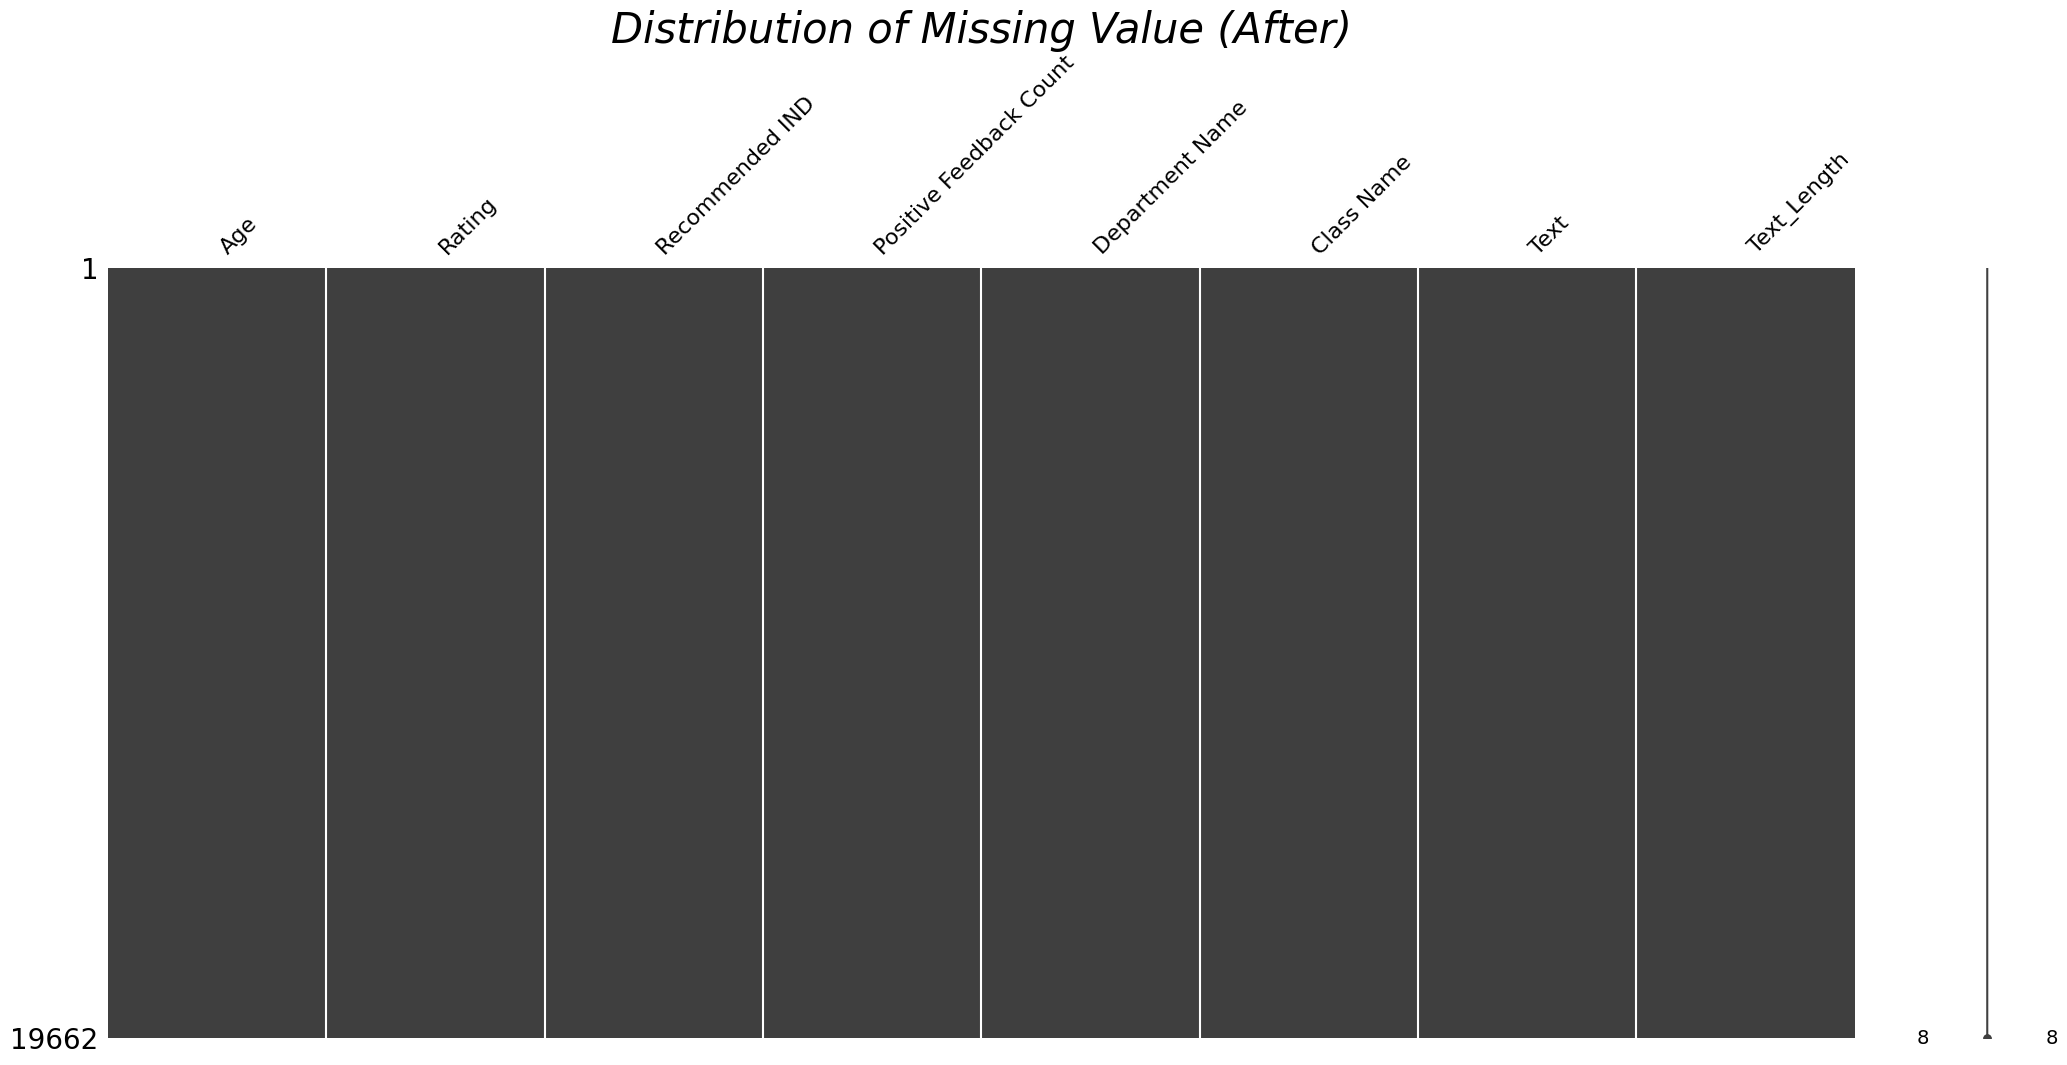

In [ ]:
df.drop(['Unnamed: 0','Clothing ID'],axis=1,inplace=True)
df.dropna(subset=['Review Text','Division Name','Title'],inplace=True)
df['Text'] = df['Title'] + ' ' + df['Review Text']
df.drop(['Title','Review Text','Division Name'],axis=1,inplace=True)
df = df.reset_index().drop('index',axis=1)
df['Text_Length'] = df['Text'].apply(len)

print('Shape of DataFrame: ',df.shape)

msno.matrix(df).set_title('Distribution of Missing Value (After)',fontsize=30, fontstyle= 'oblique')

In [ ]:
import matplotlib.pyplot as plt


BAR PLOT

<Axes: xlabel='Positive Feedback Count', ylabel='count'>

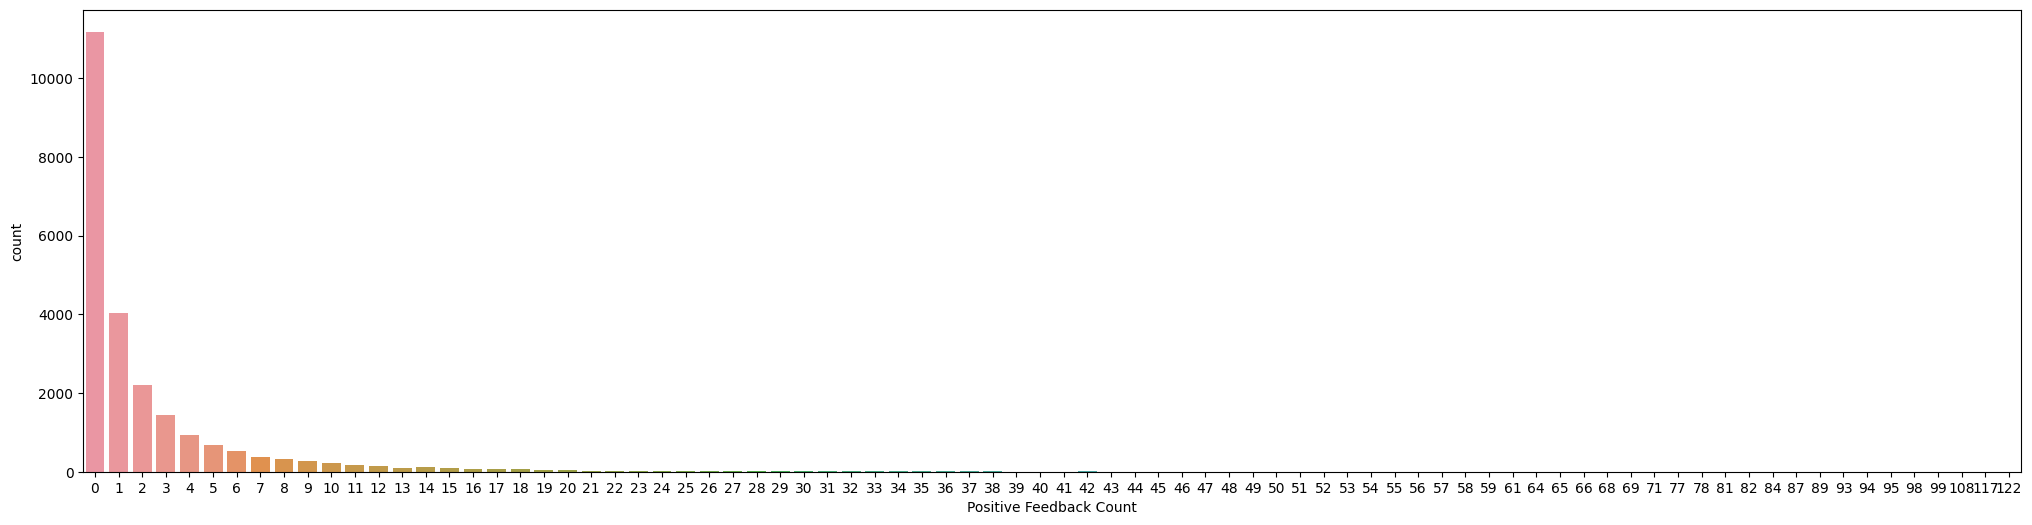

In [ ]:
plt.figure(figsize = (25,6))
sns.countplot(x='Positive Feedback Count',data=df)

<Axes: xlabel='Positive Feedback Count', ylabel='count'>

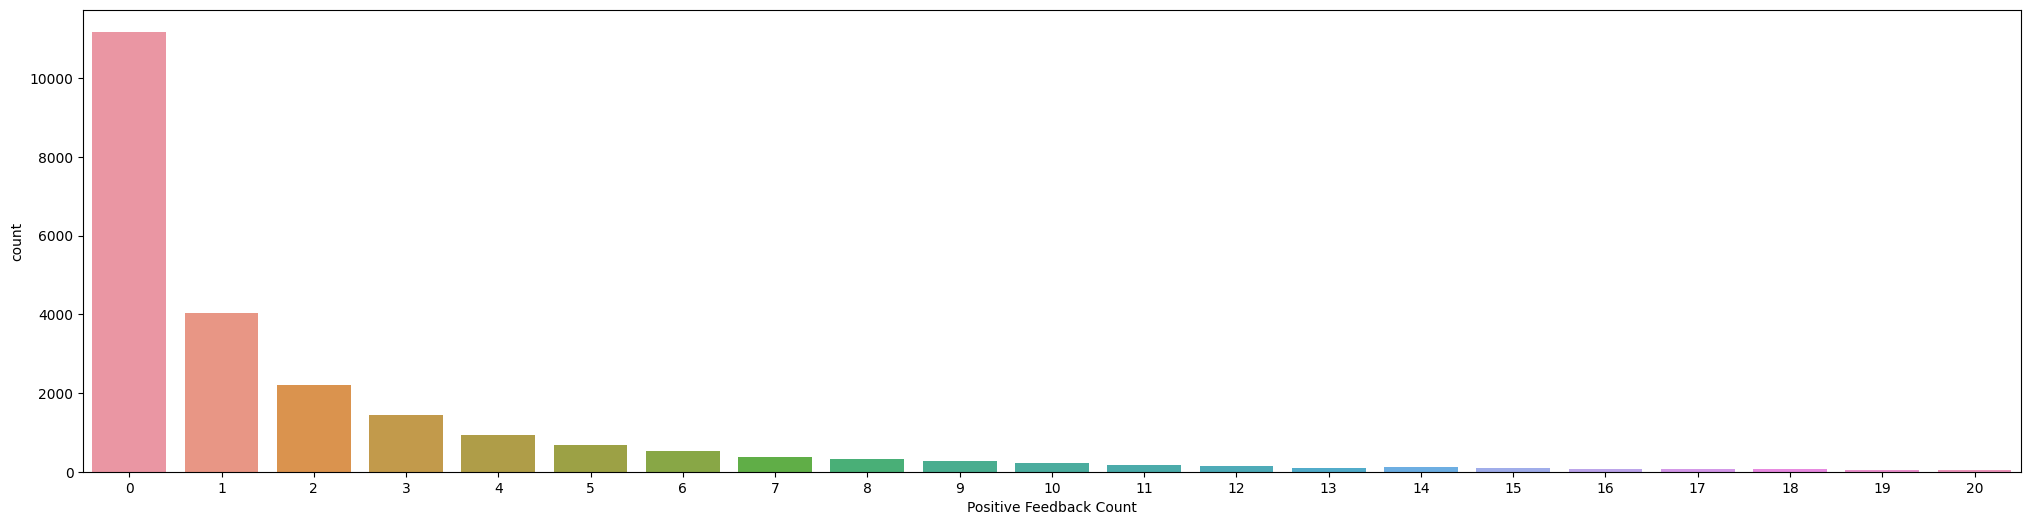

In [ ]:
drop_positive = df[df['Positive Feedback Count'] > 20].index
data = df.drop(drop_positive, axis = 0).reset_index(drop = True)

plt.figure(figsize = (25,6))
sns.countplot(x='Positive Feedback Count',data=data)

In [ ]:
data.shape

(23096, 11)

In [ ]:
df.shape

(23486, 11)

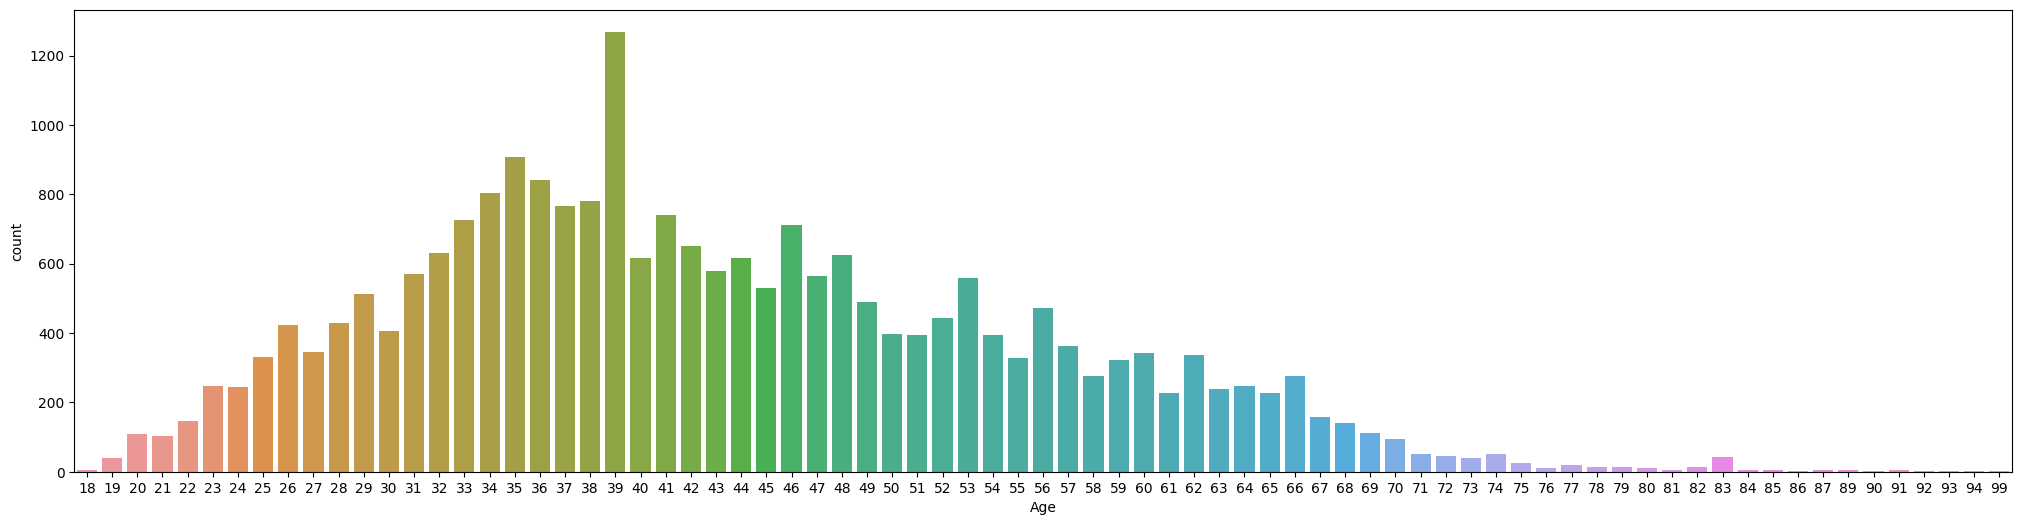

In [ ]:
plt.figure(figsize = (25,6))
sns.countplot(x='Age',data=df);

WORD CLOUD

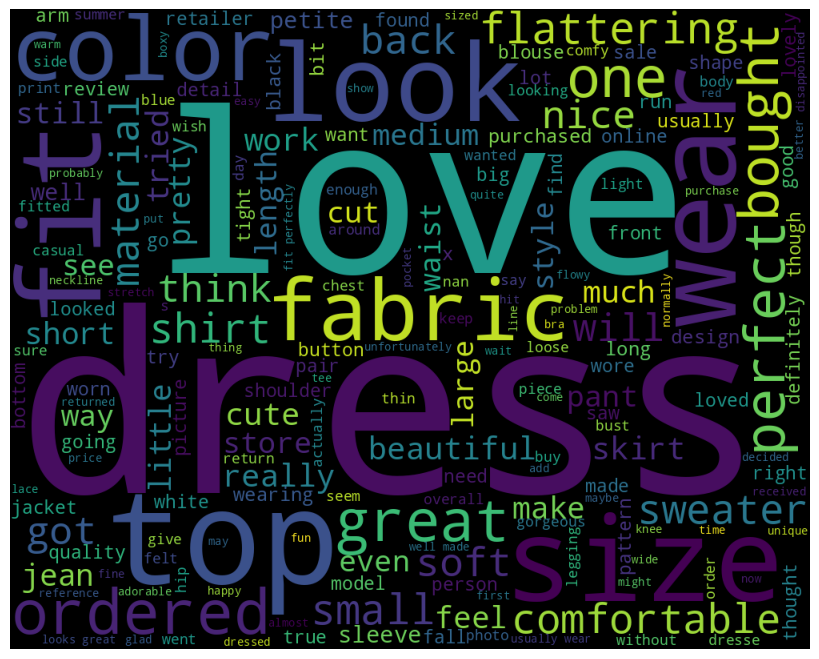

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

for val in data['Review Text']:
    val = str(val)

    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 1000, height = 800,
                background_color ='Black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)                    
plt.figure(figsize = (8, 12), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

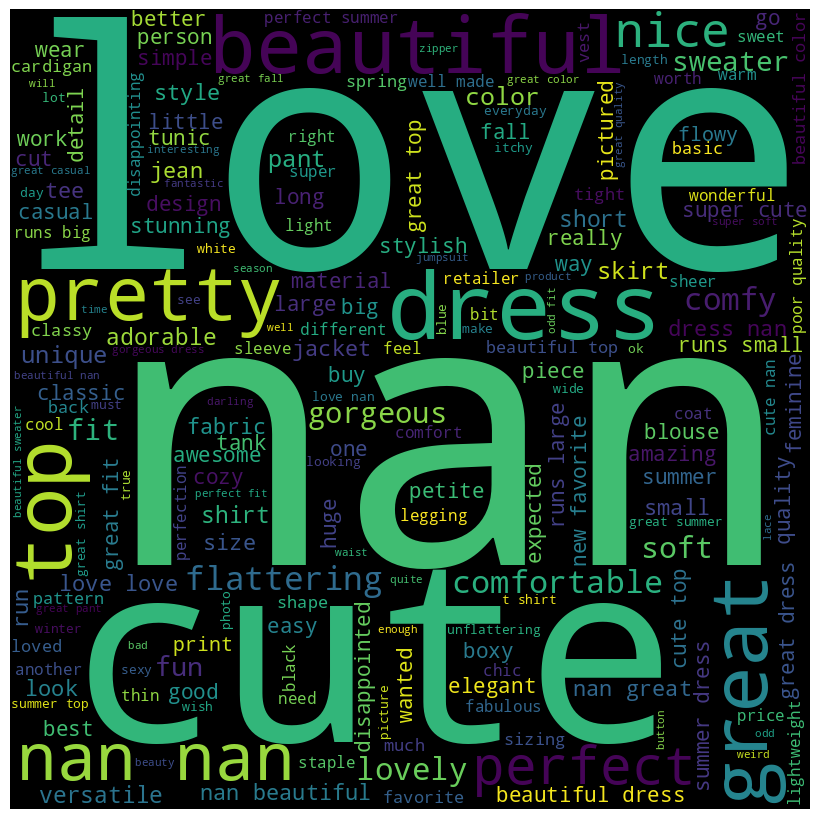

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)
for val in data['Title']:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='Black',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
num_cols = data.select_dtypes(exclude = 'object')
num_cols

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
0,0,767,33,4,1,0
1,1,1080,34,5,1,4
2,2,1077,60,3,0,0
3,3,1049,50,5,1,0
4,4,847,47,5,1,6
...,...,...,...,...,...,...
23091,23480,862,35,5,1,0
23092,23481,1104,34,5,1,0
23093,23482,862,48,3,1,0
23094,23483,1104,31,3,0,1


CORRELATION MATRIX

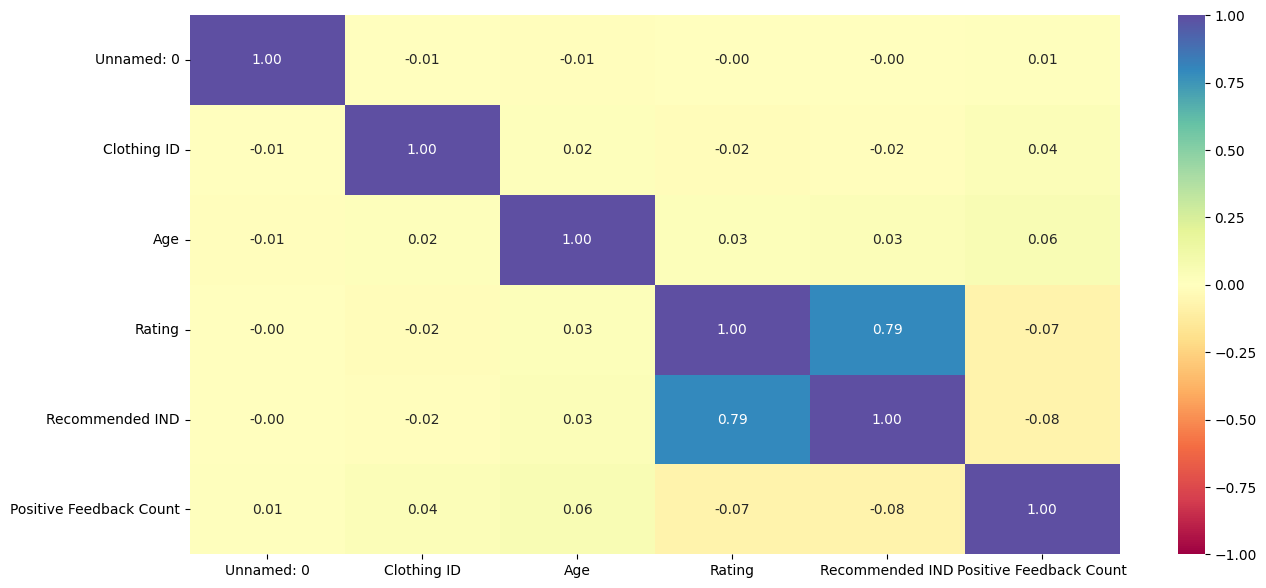

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(num_cols.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [ ]:
import plotly.express as px

In [ ]:

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot
import missingno as msno
from wordcloud import WordCloud
from PIL import Image

IMPORTING NLTK DEPENDENCIES

In [ ]:
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

##**DATA PREPROCESSING**

1. TOKENIZATION  
2.  NORMALIZATION(LOWER CASING)
3.  STEMMING / LEMMATIZATION 
4. STOP WORDS REMOVAL  
5.   REMOVAL PUNCTUATION,HTML TAGS ETC
.


In [ ]:

def get_all_str(sentences):
    sentence = ''
    for words in sentences:
        sentence += words
    sentence = sentence.lower()
    return sentence


def get_str(lst):
    sentence = ''
    for char in lst:
        sentence += char+' '
    sentence = sentence.lower()
    return sentence

def get_word(text): 
    result = nltk.RegexpTokenizer(r'\w+').tokenize(text.lower())
    return result
def remove_stopword(lst):    
    stoplist = stopwords.words('english')
    txt = ''
    for idx in range(len(lst)):
        txt += lst[idx]
        txt += '\n'
    cleanwordlist = [word for word in txt.split() if word not in stoplist] 
    return cleanwordlist

def lemmatization(words):
    lemm = WordNetLemmatizer()
    tokens = [lemm.lemmatize(word) for word in words]
    return tokens

def Freq_df(cleanwordlist):
    Freq_dist_nltk = nltk.FreqDist(cleanwordlist)
    df_freq = pd.DataFrame.from_dict(Freq_dist_nltk, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Term'
    df_freq = df_freq.sort_values(by=['Frequency'],ascending=False)
    df_freq = df_freq.reset_index()
    return df_freq

def Word_Cloud(data, color_background, colormap, title,mask):
    plt.figure(figsize = (20,15))
    wc = WordCloud(width=800, 
               height=400, 
               max_words=340,
               mask=mask,
               colormap= colormap,
               max_font_size=200,
               min_font_size = 1 ,
               random_state=8888, 
               background_color=color_background).generate_from_frequencies(data)
    
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title, fontsize=20)
    plt.axis('off')
    plt.show()

def preprocess(column):
    all_str = get_all_str(column)
    words = get_word(all_str)
    after_removing = remove_stopword(words)
    lemmatize = lemmatization( after_removing)
    frequency_df = Freq_df(lemmatize)
    return frequency_df

def create_wordcloud(column, title, color,mask):
    frequency_df = preprocess(column)
    data = frequency_df.set_index('Term').to_dict()['Frequency']
    Word_Cloud(data, 'white',color,title,mask)

TREE MAP

In [ ]:
fig = px.treemap(df, 
                 path=['Department Name','Class Name'],
                 title = ' Tree Map: Department & Class Name',
                 color_discrete_sequence=px.colors.sequential.RdBu,
                 width=1200, height=600)

fig.update_traces(textinfo='label+value', textfont_size=13,
                  marker=dict(line=dict(color='white', width=0.2)))
fig.update_layout(font = dict(size=17, family = 'Franklin Gothic'))
fig.show()


In [ ]:
top10_frequent = preprocess(df['Text'])[:10]

fig = px.bar(top10_frequent, 
             x = 'Term', y = 'Frequency',
             text = 'Frequency',
             color_discrete_sequence = px.colors.sequential.RdBu, 
             title = '1. Top 10 frequent terms (bar plot)', 
             color='Term',template = "simple_white")
fig.update_layout(font = dict(size=17, family = 'Franklin Gothic'))
fig.show()



In [ ]:
import requests

In [ ]:

url = 'https://media.istockphoto.com/photos/woman-purple-dress-fashion-model-in-long-fluttering-gown-back-rear-picture-id1090972948?k=20&m=1090972948&s=612x612&w=0&h=56SBD2hFG03zOvfRaNOI_jLpsLuXQXjRmL7LOOo38Sw='
mask = np.array(Image.open(requests.get(url, stream=True).raw))

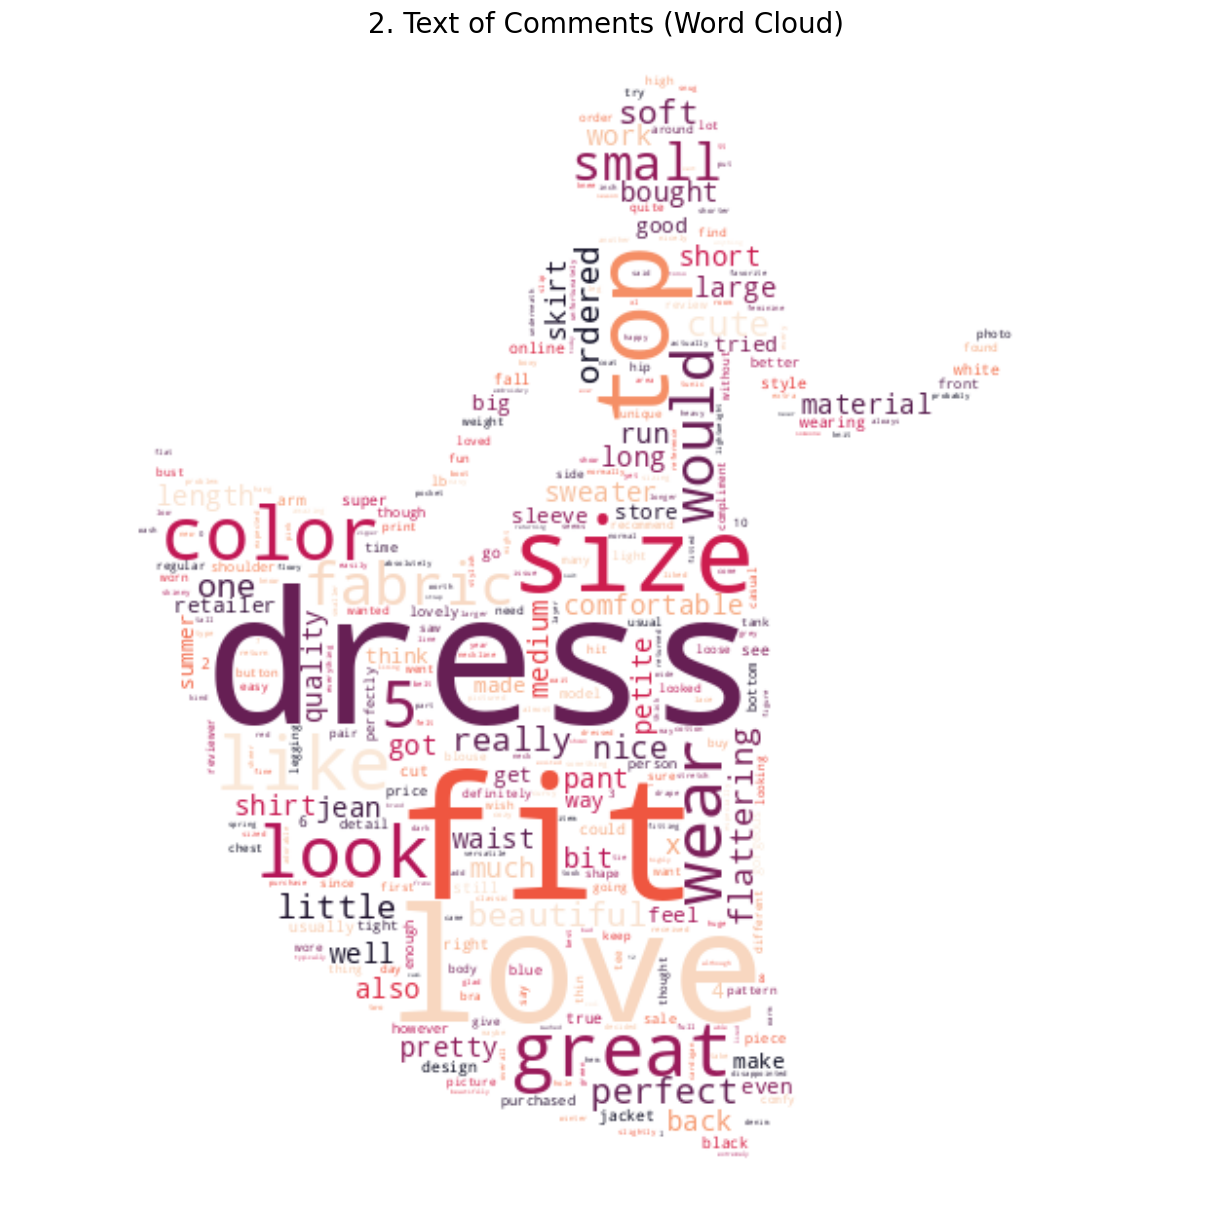

In [ ]:
create_wordcloud(df['Text'],'2. Text of Comments (Word Cloud)','rocket', mask)

In [ ]:
data=pd.DataFrame(data)

In [ ]:
data

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...,...
23091,23480,862,35,NaN,NaN,5,1,0,General Petite,Tops,Knits
23092,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23093,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23094,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses


IMPORTING SKLEARN DEPENDENCIES

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix # plot_roc_curve, plot_confusion_matrix, plot_precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

CLEANING THE DATA

In [ ]:
def preprocess_cleaning(text, pos_tags=None, lower=False):
    import re, string 
    stop_words = set(stopwords.words('english')) - {'no', 'not', 'nor'} | set()
    text = text.lower() if lower else text
    text_without_punc = text.translate(str.maketrans('', '', string.punctuation))
    text_tokens = nltk.RegexpTokenizer(r'\w+|\$[\d\.]+|\S+').tokenize(text_without_punc) 
    tokens_without_sw  = [word for word in text_tokens if word not in stop_words]
    tokens_lemmatized = [nltk.stem.WordNetLemmatizer().lemmatize(word) for word in tokens_without_sw]
    
    if pos_tags is not None:
        tokens_pos_tagged = nltk.pos_tag(tokens_lemmatized)
        tokens_lemmatized = [word for word, pos_tag in tokens_pos_tagged if pos_tag in pos_tags and word not in ['top']] # ['JJ','JJR','JJS']        
    return " ".join(tokens_lemmatized)

In [ ]:
df = pd.DataFrame(df[["Text", "Recommended IND"]].values, columns=['text', 'recommended'])
df.head()

,text,recommended
0,Some major design flaws I had such high hopes ...,0
1,"My favorite buy! I love, love, love this jumps...",1
2,Flattering shirt This shirt is very flattering...,1
3,Not for the very petite I love tracy reese dre...,0
4,Cagrcoal shimmer fun I aded this in my basket ...,1


In [ ]:
df['not_recommended'] = df['recommended'].map({0 : 1, 1: 0})
df

,text,recommended,not_recommended
0,Some major design flaws I had such high hopes ...,0,1
1,"My favorite buy! I love, love, love this jumps...",1,0
2,Flattering shirt This shirt is very flattering...,1,0
3,Not for the very petite I love tracy reese dre...,0,1
4,Cagrcoal shimmer fun I aded this in my basket ...,1,0
...,...,...,...
19657,Great dress for many occasions I was very happ...,1,0
19658,Wish it was made of cotton It reminds me of ma...,1,0
19659,"Cute, but see through This fit well, but the t...",0,1
19660,"Very cute dress, perfect for summer parties an...",1,0


In [ ]:
df['text_clean']    = df['text'].apply(preprocess_cleaning)
df['text_only_adj'] = df['text'].apply(preprocess_cleaning, pos_tags=['JJ','JJR','JJS'])

In [ ]:
df.head()

,text,recommended,not_recommended,text_clean,text_only_adj
0,Some major design flaws I had such high hopes ...,0,1,Some major design flaw I high hope dress reall...,major petite small usual small small reordered...
1,"My favorite buy! I love, love, love this jumps...",1,0,My favorite buy I love love love jumpsuit fun ...,favorite fabulous wear great
2,Flattering shirt This shirt is very flattering...,1,0,Flattering shirt This shirt flattering due adj...,due adjustable perfect cardigan
3,Not for the very petite I love tracy reese dre...,0,1,Not petite I love tracy reese dress one not pe...,petite reese petite full small stranger narrow...
4,Cagrcoal shimmer fun I aded this in my basket ...,1,0,Cagrcoal shimmer fun I aded basket hte last mi...,last teh gorgeous little baggy


##NLP TECHNIQUES

VADER (VALENCE ADHERE DICTIONARY SENTIMENT RESONER)

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')  # Download the pre-trained sentiment analyzer

sid = SentimentIntensityAnalyzer()
def get_sentiment_scores(text):
    scores = sid.polarity_scores(text)
    return scores
df['sentiment_scores'] = df['text_clean'].apply(get_sentiment_scores)
df['sentiment_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
df.head()

,text,recommended,not_recommended,text_clean,text_only_adj,sentiment_scores,sentiment_score
0,Some major design flaws I had such high hopes ...,0,1,Some major design flaw I high hope dress reall...,major petite small usual small small reordered...,"{'neg': 0.035, 'neu': 0.717, 'pos': 0.248, 'co...",0.9081
1,"My favorite buy! I love, love, love this jumps...",1,0,My favorite buy I love love love jumpsuit fun ...,favorite fabulous wear great,"{'neg': 0.155, 'neu': 0.212, 'pos': 0.633, 'co...",0.9587
2,Flattering shirt This shirt is very flattering...,1,0,Flattering shirt This shirt flattering due adj...,due adjustable perfect cardigan,"{'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compou...",0.9274
3,Not for the very petite I love tracy reese dre...,0,1,Not petite I love tracy reese dress one not pe...,petite reese petite full small stranger narrow...,"{'neg': 0.129, 'neu': 0.786, 'pos': 0.084, 'co...",-0.5165
4,Cagrcoal shimmer fun I aded this in my basket ...,1,0,Cagrcoal shimmer fun I aded basket hte last mi...,last teh gorgeous little baggy,"{'neg': 0.079, 'neu': 0.755, 'pos': 0.166, 'co...",0.7425


TEXTBLOB SENTIMENT

In [ ]:
from textblob import TextBlob
import pandas as pd


def get_sentiment_scores(text):
    blob = TextBlob(text)
    sentiment_score = blob.sentiment.polarity
    return sentiment_score

df['textblob_sentiment_score'] = df['text_clean'].apply(get_sentiment_scores)



In [ ]:
df.head()

,text,recommended,not_recommended,text_clean,text_only_adj,sentiment_scores,sentiment_score,textblob_sentiment_score
0,Some major design flaws I had such high hopes ...,0,1,Some major design flaw I high hope dress reall...,major petite small usual small small reordered...,"{'neg': 0.035, 'neu': 0.717, 'pos': 0.248, 'co...",0.9081,0.081439
1,"My favorite buy! I love, love, love this jumps...",1,0,My favorite buy I love love love jumpsuit fun ...,favorite fabulous wear great,"{'neg': 0.155, 'neu': 0.212, 'pos': 0.633, 'co...",0.9587,0.500000
2,Flattering shirt This shirt is very flattering...,1,0,Flattering shirt This shirt flattering due adj...,due adjustable perfect cardigan,"{'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compou...",0.9274,0.458333
3,Not for the very petite I love tracy reese dre...,0,1,Not petite I love tracy reese dress one not pe...,petite reese petite full small stranger narrow...,"{'neg': 0.129, 'neu': 0.786, 'pos': 0.084, 'co...",-0.5165,0.150000
4,Cagrcoal shimmer fun I aded this in my basket ...,1,0,Cagrcoal shimmer fun I aded basket hte last mi...,last teh gorgeous little baggy,"{'neg': 0.079, 'neu': 0.755, 'pos': 0.166, 'co...",0.7425,0.120500


In [ ]:
def predictor(x):
  if x>0.5: 
    return 1
  else:
    return 0

In [ ]:
df['Sentiment_Intensity_Analyzer_Prediction']=df['sentiment_score'].map(predictor)

In [ ]:
def predictor1(x):
  if x>0: 
    return 1
  else:
    return 0

In [ ]:
df['Text_Blob_Prediction']=df['textblob_sentiment_score'].map(predictor1)

In [ ]:
df.head()

,text,recommended,not_recommended,text_clean,text_only_adj,sentiment_scores,sentiment_score,textblob_sentiment_score,Sentiment_Intensity_Analyzer_Prediction,Text_Blob_Prediction
0,Some major design flaws I had such high hopes ...,0,1,Some major design flaw I high hope dress reall...,major petite small usual small small reordered...,"{'neg': 0.035, 'neu': 0.717, 'pos': 0.248, 'co...",0.9081,0.081439,1,1
1,"My favorite buy! I love, love, love this jumps...",1,0,My favorite buy I love love love jumpsuit fun ...,favorite fabulous wear great,"{'neg': 0.155, 'neu': 0.212, 'pos': 0.633, 'co...",0.9587,0.500000,1,1
2,Flattering shirt This shirt is very flattering...,1,0,Flattering shirt This shirt flattering due adj...,due adjustable perfect cardigan,"{'neg': 0.0, 'neu': 0.49, 'pos': 0.51, 'compou...",0.9274,0.458333,1,1
3,Not for the very petite I love tracy reese dre...,0,1,Not petite I love tracy reese dress one not pe...,petite reese petite full small stranger narrow...,"{'neg': 0.129, 'neu': 0.786, 'pos': 0.084, 'co...",-0.5165,0.150000,0,1
4,Cagrcoal shimmer fun I aded this in my basket ...,1,0,Cagrcoal shimmer fun I aded basket hte last mi...,last teh gorgeous little baggy,"{'neg': 0.079, 'neu': 0.755, 'pos': 0.166, 'co...",0.7425,0.120500,1,1


In [ ]:
x=df['recommended'].astype(int)
y=df['Sentiment_Intensity_Analyzer_Prediction']
z=df['Text_Blob_Prediction']


RESULTS OF NLP TECHNIQUES

In [ ]:
from sklearn.metrics import accuracy_score
print(f"SENTIENT INTENSITY ANALYZER: {accuracy_score(x,y)}")
print(f"TEXT BLOB PREDICTION:        {accuracy_score(x,z)}")

SENTIENT INTENSITY ANALYZER: 0.8478791577662497
TEXT BLOB PREDICTION:        0.8368935001525786


**Fine Grained Based Sentiment Analysis**

In [ ]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Department Name,Class Name,Text,Text_Length
0,60,3,0,0,Dresses,Dresses,Some major design flaws I had such high hopes ...,524
1,50,5,1,0,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",141
2,47,5,1,6,Tops,Blouses,Flattering shirt This shirt is very flattering...,209
3,49,2,0,4,Dresses,Dresses,Not for the very petite I love tracy reese dre...,512
4,39,5,1,1,Tops,Knits,Cagrcoal shimmer fun I aded this in my basket ...,517


In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.metrics import f1_score,accuracy_score
import matplotlib.pyplot as plt
import os,sys

In [ ]:
df = pd.DataFrame(df[["Text", "Rating"]].values, columns=['text', 'rating'])
df.head()

,text,rating
0,Some major design flaws I had such high hopes ...,3
1,"My favorite buy! I love, love, love this jumps...",5
2,Flattering shirt This shirt is very flattering...,5
3,Not for the very petite I love tracy reese dre...,2
4,Cagrcoal shimmer fun I aded this in my basket ...,5


In [ ]:
df['text_clean']    = df['text'].apply(preprocess_cleaning)

In [ ]:
df.head()

,text,rating,text_clean
0,Some major design flaws I had such high hopes ...,3,Some major design flaw I high hope dress reall...
1,"My favorite buy! I love, love, love this jumps...",5,My favorite buy I love love love jumpsuit fun ...
2,Flattering shirt This shirt is very flattering...,5,Flattering shirt This shirt flattering due adj...
3,Not for the very petite I love tracy reese dre...,2,Not petite I love tracy reese dress one not pe...
4,Cagrcoal shimmer fun I aded this in my basket ...,5,Cagrcoal shimmer fun I aded basket hte last mi...


In [ ]:
def textblob_score(sentence):
    return TextBlob(sentence).sentiment.polarity

In [ ]:
df['textblob_score'] =  df['text_clean'].apply(textblob_score)
df.head()

,text,rating,text_clean,textblob_score
0,Some major design flaws I had such high hopes ...,3,Some major design flaw I high hope dress reall...,0.081439
1,"My favorite buy! I love, love, love this jumps...",5,My favorite buy I love love love jumpsuit fun ...,0.500000
2,Flattering shirt This shirt is very flattering...,5,Flattering shirt This shirt flattering due adj...,0.458333
3,Not for the very petite I love tracy reese dre...,2,Not petite I love tracy reese dress one not pe...,0.150000
4,Cagrcoal shimmer fun I aded this in my basket ...,5,Cagrcoal shimmer fun I aded basket hte last mi...,0.120500


In [ ]:
df['textblob_pred'] = pd.cut(df['textblob_score'],bins=5,labels=[1,2,3,4,5])
df  = df.drop(['textblob_score'],axis=1)

In [ ]:
df.head()

,text,rating,text_clean,textblob_pred
0,Some major design flaws I had such high hopes ...,3,Some major design flaw I high hope dress reall...,3
1,"My favorite buy! I love, love, love this jumps...",5,My favorite buy I love love love jumpsuit fun ...,4
2,Flattering shirt This shirt is very flattering...,5,Flattering shirt This shirt flattering due adj...,4
3,Not for the very petite I love tracy reese dre...,2,Not petite I love tracy reese dress one not pe...,3
4,Cagrcoal shimmer fun I aded this in my basket ...,5,Cagrcoal shimmer fun I aded basket hte last mi...,3


In [ ]:
from sklearn.metrics import accuracy_score
x=df['rating'].astype(int)
y=df['textblob_pred']
print(f"TEXT BLOB PREDICTION:        {accuracy_score(x,y)}")

TEXT BLOB PREDICTION:        0.21416946394059608


In [ ]:
from sklearn.model_selection import cross_val_score
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer
df = df.dropna(subset=['text_clean'])
df = df.dropna(subset=['rating'])
all_text=df['text_clean']
train_text=df['text_clean']
y=df['rating'].map({1:0,2:1,3:2,4:3,5:4})

#Using the N-Gram Tf-idf Vectorizer
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=10000)
word_vectorizer.fit(all_text)
train_word_features = word_vectorizer.transform(train_text)
char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=10000)
char_vectorizer.fit(all_text)
train_char_features = char_vectorizer.transform(train_text)

train_features = hstack([train_char_features, train_word_features])
#Random Forest Classifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_features, y,test_size=0.3,random_state=101)
from sklearn.ensemble import RandomForestClassifier



/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning:

The parameter 'stop_words' will not be used since 'analyzer' != 'word'



In [ ]:
print(X_train.shape)

(13763, 20000)


In [ ]:
print(y_train.shape)

(13763,)


In [ ]:
import xgboost as xgb
xgb=xgb.XGBClassifier()
xgb.fit(X_train,y_train)
preds2=xgb.predict(X_test)
print(classification_report(preds2,y_test))

              precision    recall  f1-score   support

           0       0.10      0.43      0.17        47
           1       0.19      0.36      0.25       208
           2       0.35      0.41      0.38       608
           3       0.28      0.40      0.33       942
           4       0.91      0.73      0.81      4094

    accuracy                           0.63      5899
   macro avg       0.37      0.46      0.39      5899
weighted avg       0.72      0.63      0.66      5899



In [ ]:
import pickle
file_name="finegrained.sav"
pickle.dump(xgb,open(file_name,'wb'))